### DTs Vizualization

Dataset:
     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no 

Sample:
   outlook  temp  humidity  windy
0        1     0         1      0 

Prediction: 1


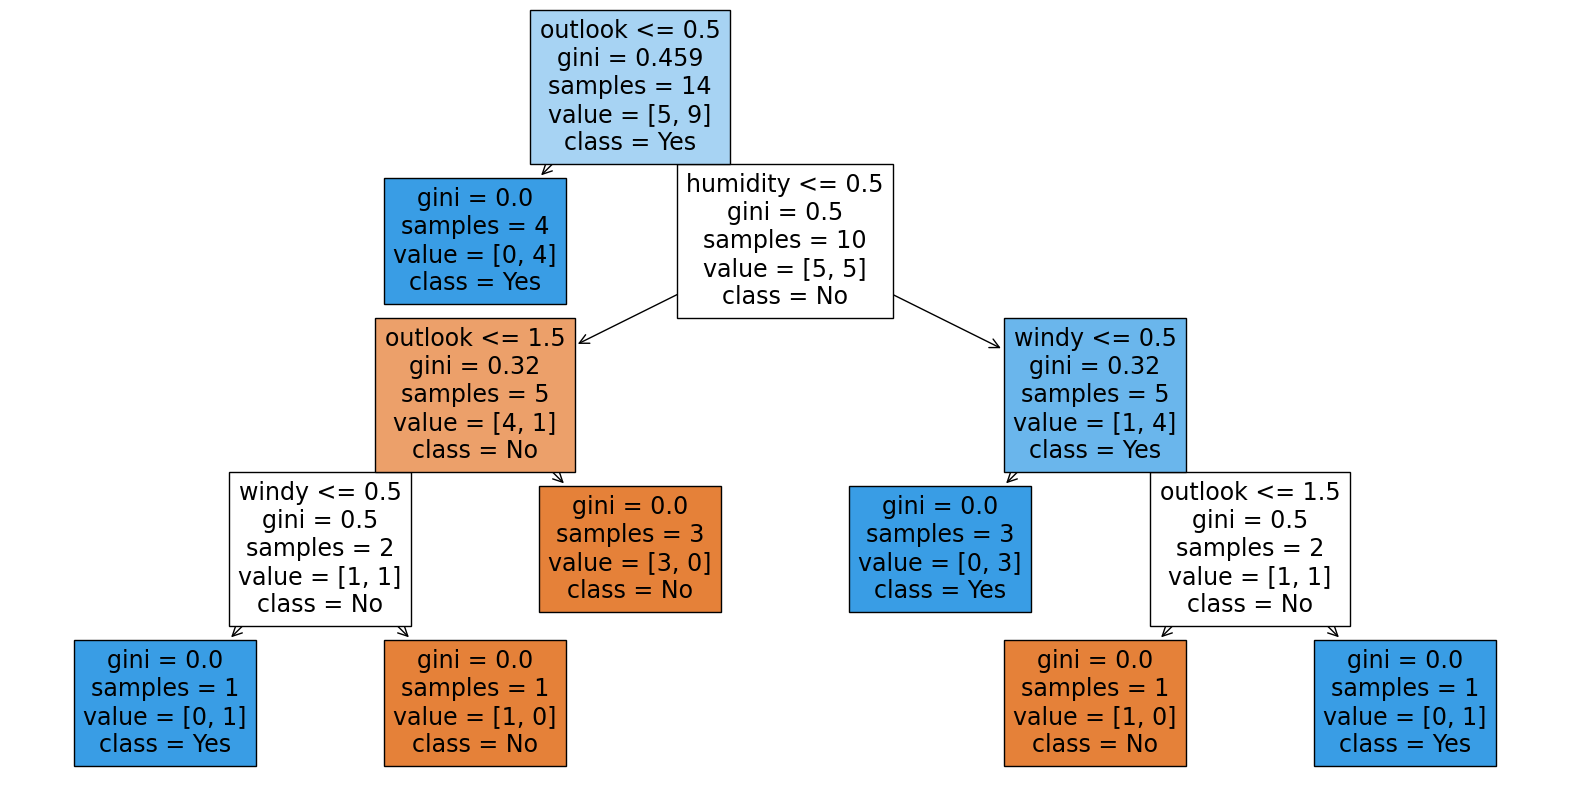

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

# Dataset
df = pd.read_csv('data/play_tennis.csv')

# Encode lables
df_encoded = pd.DataFrame()
for col in df.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Train data
X = df_encoded.drop(columns=["play"])
Y = df_encoded['play']

# Fitting the model
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X, Y)

# Prediction
x_unknown =  [1, 0, 1, 0] # expect 1
x_unknown = pd.DataFrame([x_unknown], columns=X.columns)
y_pred = dtree_model.predict(x_unknown)[0]

print("Dataset:"); print(df, "\n")
print("Sample:"); print(x_unknown, "\n")
print("Prediction:", y_pred)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtree_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

### Dtreeviz Vizualization


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import dtreeviz

import logging
logging.getLogger('matplotlib').setLevel(logging.ERROR) # font arial not found

# Dataset
df = pd.read_csv('data/play_tennis.csv')

features = ['outlook', 'temp', 'humidity', 'windy']
target = 'play'

# Encode lables
df_encoded = pd.DataFrame()
for col in df.columns:
    df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Train data
X = df_encoded.drop(columns=["play"])
y = df_encoded['play']

# Fitting the model
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

# Visualizing the decision tree
viz_model = dtreeviz.model(clf, 
        X_train=df_encoded[features], y_train=df_encoded[target],
        feature_names=X.columns,
        target_name='play',
        class_names=["Don't Play", "Play"])

# Display the decision tree (inline)
viz_model.view(scale=2.0)

# Display the decision tree (popup)
v = viz_model.view(scale=2)  
v.show()

### References

https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb